In [1]:
# required packages

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data

df_electricity = pd.read_excel('Data/electricity_consumption.xlsx')
df_temperature = pd.read_csv('Data/temperature_data.csv')

In [ ]:
df_electricity.head()

In [ ]:
# check data types

df_electricity.dtypes

In [ ]:
# check for missing values

missing_values = df_electricity.isnull().sum()
print(missing_values)

In [ ]:
# identify duplicates

duplicates = df_electricity.duplicated()
print(duplicates)

In [ ]:
df_temperature.head()

In [ ]:
# check data types

df_temperature.dtypes

In [ ]:
# check for missing values

missing_values = df_temperature.isnull().sum()
print(missing_values)

In [ ]:
# identify duplicates

duplicates = df_temperature.duplicated()
print(duplicates)

In [11]:
# convert the date column to datetime format

df_temperature['Date'] = pd.to_datetime(df_temperature['Date'], format='%d.%m.%Y')

In [12]:
# remove symbols at the end of each value and convert to int

df_temperature['High'] = df_temperature['High'].str.replace(r'\D+','', regex=True).astype(int)
df_temperature['Low'] = df_temperature['Low'].str.replace(r'\D+','', regex=True).astype(int)

In [ ]:
df_temperature.head()

In [ ]:
df_temperature.dtypes

In [15]:
df = pd.merge(df_electricity, df_temperature, on='Date')

In [ ]:
df.head()

In [17]:
# calculate the Pearson correlation coefficient and its p-value between 'consumed' and 'pump_time' columns

pearson_coef, p_value = stats.pearsonr(df['consumed'], df['pump_time'])
print("The Pearson Correlation Coefficient =", pearson_coef, " with a P-value =", p_value)

The Pearson Correlation Coefficient = -0.12998850087860728  with a P-value = 0.3222162689664707


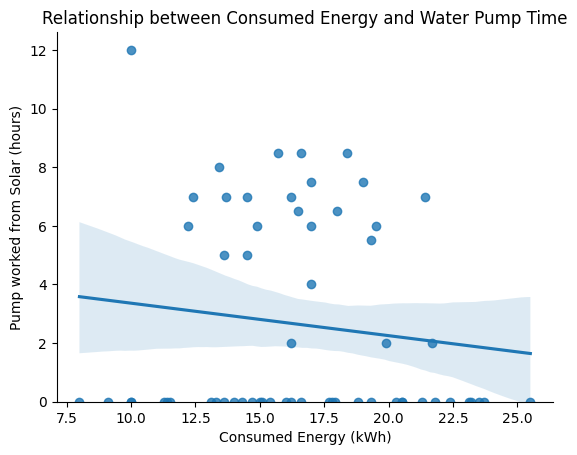

In [18]:
# plot a regression line between 'consumed' and 'pump_time' columns

sns.regplot(x="consumed", y="pump_time", data=df)
plt.ylim(0,)
plt.xlabel('Consumed Energy (kWh)')
plt.ylabel('Pump worked from Solar (hours)')
plt.title('Relationship between Consumed Energy and Water Pump Time')
sns.despine()

In [19]:
# calculate the Pearson correlation coefficient and its p-value between 'consumed' and 'aircond_time' columns

pearson_coef, p_value = stats.pearsonr(df['consumed'], df['aircond_time'])
print("The Pearson Correlation Coefficient =", pearson_coef, " with a P-value =", p_value)

The Pearson Correlation Coefficient = 0.5158526975739279  with a P-value = 2.4609832283693523e-05


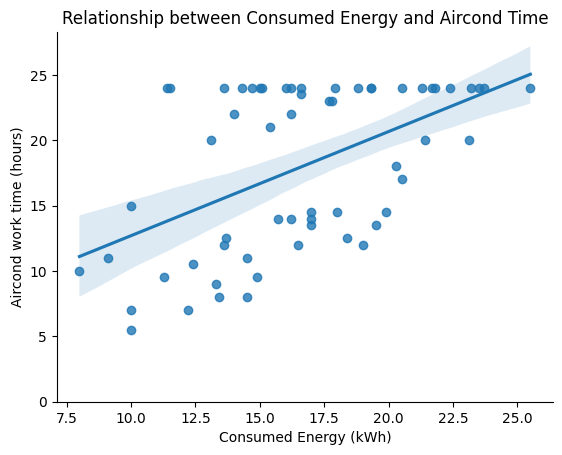

In [20]:
# plot a regression line between 'consumed' and 'aircond_time' columns

sns.regplot(x="consumed", y="aircond_time", data=df)
plt.ylim(0,)
plt.xlabel('Consumed Energy (kWh)')
plt.ylabel('Aircond work time (hours)')
plt.title('Relationship between Consumed Energy and Aircond Time')
sns.despine()

In [ ]:
df.head()

In [22]:
# addign mean temperature for each day

df = df.assign(mean_temp=(df['High'] + df['Low']) / 2)

In [ ]:
df.head()

In [24]:
# calculate the Pearson correlation coefficient and its p-value between 'consumed' and 'mean_temp' columns

pearson_coef, p_value = stats.pearsonr(df['consumed'], df['mean_temp'])
print("The Pearson Correlation Coefficient =", pearson_coef, " with a P-value =", p_value)

The Pearson Correlation Coefficient = 0.1195842470415594  with a P-value = 0.3627794631839265


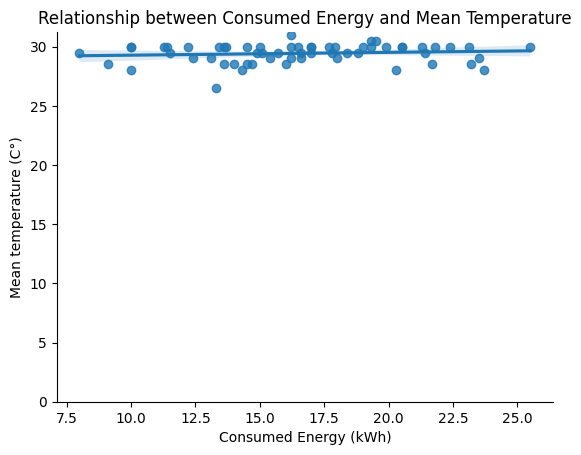

In [25]:
# plot a regression line between 'consumed' and 'mean_temp' columns

sns.regplot(x="consumed", y="mean_temp", data=df)
plt.ylim(0,)
plt.xlabel('Consumed Energy (kWh)')
plt.ylabel('Mean temperature (C°)')
plt.title('Relationship between Consumed Energy and Mean Temperature')
sns.despine()